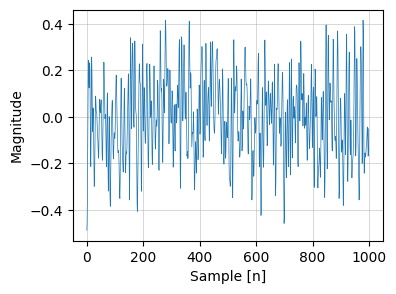

In [103]:
import numpy as np
from scipy.signal import butter, lfilter
from matplotlib import pyplot as plt

b, a = butter(5, np.pi/10, 'low') # b, a = representation of the filter
n = np.random.rand(1000)
x = lfilter(b,a,n)
x -= np.mean(x)

plt.figure(figsize=(4,3))
plt.plot(x, linewidth=0.5)
plt.xlabel('Sample [n]')
plt.ylabel('Magnitude')
plt.grid(linewidth=0.5,alpha=0.7)
plt.show()

In [104]:
# 1. Rxx
# 2. Matrix: R, r
# 3. ap
# 4. Performance

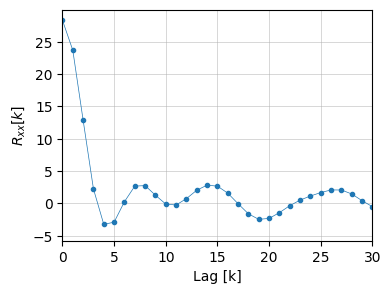

In [118]:
from scipy.signal import correlate, correlation_lags
Rxx = correlate(x,x)
# lags = np.arange(-len(x)+1,len(x))
lags = correlation_lags(len(x),len(x))
plt.figure(figsize=(4,3))
plt.plot(lags, Rxx, '.-', linewidth=0.5)
plt.xlabel('Lag [k]')
plt.ylabel(r'$R_{xx}[k]$')
plt.grid(linewidth=0.5,alpha=0.7)
plt.xlim([0,30])
plt.show()

In [106]:
Rxx[lags >= 0][:3] # positive k
Rxx[(lags >= 0) & (lags < 3)] # positive k

array([28.3458822 , 23.70408434, 12.89517025])

In [119]:
from scipy.linalg import toeplitz, solve
p = 3
R = toeplitz(Rxx[lags >= 0][:p]) # X.T @ X
r = Rxx[lags >= 0][1:p+1]
a = solve(R,r)
print(a)

[ 2.06567351 -1.83818934  0.67648129]


In [120]:
from scipy.linalg import solve_toeplitz
a = solve_toeplitz(Rxx[lags >= 0][:p], Rxx[lags >= 0][1:p+1])
print(a)

[ 2.06567351 -1.83818934  0.67648129]


In [121]:
np.linalg.inv(R) @ r

array([ 2.06567351, -1.83818934,  0.67648129])

In [123]:
import librosa
a = librosa.lpc(x,order=p)
print(a)

[ 1.         -2.21450183  2.08327537 -0.8143058 ]


### Signal evaluation
The goal of this part is **performance evaluation** (writen in *Markdown*)

In [110]:
b = np.concatenate(([0],a))
print(b)
x_hat = lfilter(b,1,x)

[ 0.          2.12878679 -1.80788623  0.29492814  0.5147728  -0.13789846
 -0.23304598  0.07140747  0.11802015 -0.04249087 -0.06090968  0.04225924
  0.03536724 -0.04278303 -0.00896936  0.05327905 -0.00368767 -0.05689502
  0.01182745  0.03591627 -0.02766363]


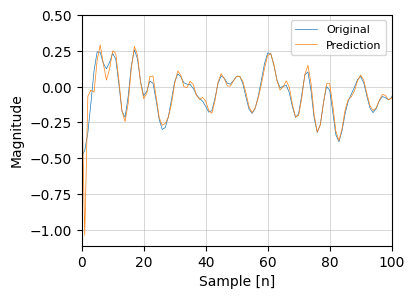

In [111]:
plt.figure(figsize=(4,3))
plt.plot(x, linewidth=0.5, label='Original')
plt.plot(x_hat, linewidth=0.5, label='Prediction')
plt.xlabel('Sample [n]')
plt.ylabel('Magnitude')
plt.grid(linewidth=0.5,alpha=0.7)
plt.xlim([0,100])
plt.legend(fontsize=8)
plt.show()

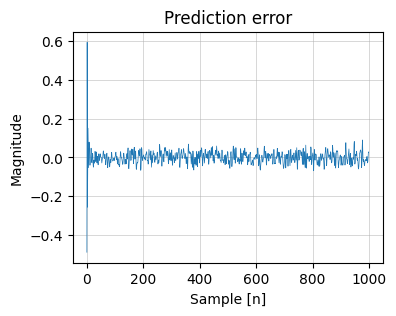

In [112]:
# prediction error
e = x - x_hat
plt.figure(figsize=(4,3))
plt.plot(e, linewidth=0.5)
plt.xlabel('Sample [n]')
plt.ylabel('Magnitude')
plt.grid(linewidth=0.5,alpha=0.7)
plt.title('Prediction error')
plt.show()

In [113]:
se = e.T @ e
se = np.sum(e*e)
se = np.sum(e ** 2)
print(f'{e @ e:.3f}, {se:.3f}')

1.389, 1.389


In [114]:
se_theory = Rxx[lags==0] - r @ a
print(f'{se_theory[0]:.3f}')
print(f'{se_theory}')

1.401
[1.4007196]
